In [1]:
%load_ext autoreload
%matplotlib widget
%autoreload 2
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)
from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders
from datetime import datetime

from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    load_graphs,
)
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_color_value,
    reconstruct_image_from_general,
    plot_full,
    find_nearest_edge,
)
from amftrack.pipeline.functions.image_processing.extract_width_fun import (
    get_width_info,
    get_width_info_new,
)
import matplotlib.pyplot as plt
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
)
import pandas as pd
from amftrack.pipeline.functions.spore_processing.spore_id import make_spore_data
from amftrack.pipeline.functions.image_processing.hyphae_id_surf import (
    resolve_anastomosis_crossing_by_root,
)
from amftrack.pipeline.functions.post_processing.time_hypha import *
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Node,
    Edge,
    Hyphae,
)
from datetime import datetime
from matplotlib import cm
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from IPython.display import clear_output
from amftrack.pipeline.functions.post_processing.exp_plot import *

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
2023-03-29 09:45:45.566053: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 09:45:46.000375: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /gpfs/home2/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/cv2/../../lib64:
2023-03-29 09:45:46.000410: I tensorflow/stream_executor/cuda/cudart_stub.cc:29

In [2]:
plates = ["1045_20220504", "1048_20220506", "52_20220707"]
directory_targ = directory_project
# update_analysis_info(directory_targ)
# analysis_info = get_analysis_info(directory_targ)
# analysis_folders = analysis_info.loc[analysis_info["unique_id"].isin(plates)]
update_plate_info(directory_targ, local=True)
all_folders = get_current_folders(directory_targ, local=True)

analysed:   0%|          | 0/3345 [00:00<?, ?it/s]

In [32]:
folders = all_folders.loc[all_folders["unique_id"] == "1048_20220506"]
folders = folders.sort_values(by="datetime")
folders = folders.iloc[0:82:2]
folders

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,Temperature,...,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,Temp,unique_id,datetime
720,/projects/0/einf914/data/20220506_2350_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,25,...,False,True,True,True,True,"06.05.2022, 23:50:",20220506_2350_Plate03,NaN,1048_20220506,2022-05-06 23:50:00
2980,/projects/0/einf914/data/20220507_0350_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,25,...,False,True,True,True,True,"07.05.2022, 03:50:",20220507_0350_Plate03,NaN,1048_20220506,2022-05-07 03:50:00
2110,/projects/0/einf914/data/20220507_0750_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,25,...,False,True,True,True,True,"07.05.2022, 07:50:",20220507_0750_Plate03,NaN,1048_20220506,2022-05-07 07:50:00
27,/projects/0/einf914/data/20220507_1150_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,25,...,False,True,True,True,True,"07.05.2022, 11:50:",20220507_1150_Plate03,NaN,1048_20220506,2022-05-07 11:50:00
2084,/projects/0/einf914/data/20220507_1550_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,25,...,False,True,True,True,True,"07.05.2022, 15:50:",20220507_1550_Plate03,NaN,1048_20220506,2022-05-07 15:50:00
563,/projects/0/einf914/data/20220507_1950_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,25,...,False,True,True,True,True,"07.05.2022, 19:50:",20220507_1950_Plate03,NaN,1048_20220506,2022-05-07 19:50:00
521,/projects/0/einf914/data/20220507_2350_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,25,...,False,True,True,True,True,"07.05.2022, 23:50:",20220507_2350_Plate03,NaN,1048_20220506,2022-05-07 23:50:00
2102,/projects/0/einf914/data/20220508_0350_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,25,...,False,True,True,True,True,"08.05.2022, 03:50:",20220508_0350_Plate03,NaN,1048_20220506,2022-05-08 03:50:00
168,/projects/0/einf914/data/20220508_0750_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,25,...,False,True,True,True,True,"08.05.2022, 07:50:",20220508_0750_Plate03,NaN,1048_20220506,2022-05-08 07:50:00
2023,/projects/0/einf914/data/20220508_1150_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,25,...,False,True,True,True,True,"08.05.2022, 11:50:",20220508_1150_Plate03,NaN,1048_20220506,2022-05-08 11:50:00


In [33]:
# folders = all_folders.loc[all_folders["unique_id"] == "1045_20220504"]
# folders = folders.sort_values(by="datetime")
# folders = folders.iloc[60:62]

exp = Experiment(directory_targ)
exp.load(folders)
exp.dates.sort()
for t in range(len(folders)):
    exp.load_tile_information(t)

2022-05-06 23:50:00
2022-05-07 03:50:00
2022-05-07 07:50:00
2022-05-07 11:50:00
2022-05-07 15:50:00
2022-05-07 19:50:00
2022-05-07 23:50:00
2022-05-08 03:50:00
2022-05-08 07:50:00
2022-05-08 11:50:00
2022-05-08 15:50:00
2022-05-08 20:02:00
2022-05-09 00:02:00
2022-05-09 04:02:00
2022-05-09 11:39:00
2022-05-09 15:39:00
2022-05-09 19:39:00
2022-05-09 23:39:00
2022-05-10 03:39:00
2022-05-10 07:39:00
2022-05-10 11:53:00
2022-05-10 16:12:00
2022-05-10 20:10:00
2022-05-11 00:11:00
2022-05-11 04:11:00
2022-05-11 08:10:00
2022-05-11 12:46:00
2022-05-11 17:07:00
2022-05-11 21:07:00
2022-05-12 01:07:00
2022-05-12 05:07:00
2022-05-12 09:07:00
2022-05-12 13:07:00
2022-05-12 17:46:00
2022-05-12 21:49:00
2022-05-13 01:49:00
2022-05-13 05:49:00
2022-05-13 09:52:00
2022-05-13 13:52:00
2022-05-13 17:52:00
2022-05-13 21:51:00


/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


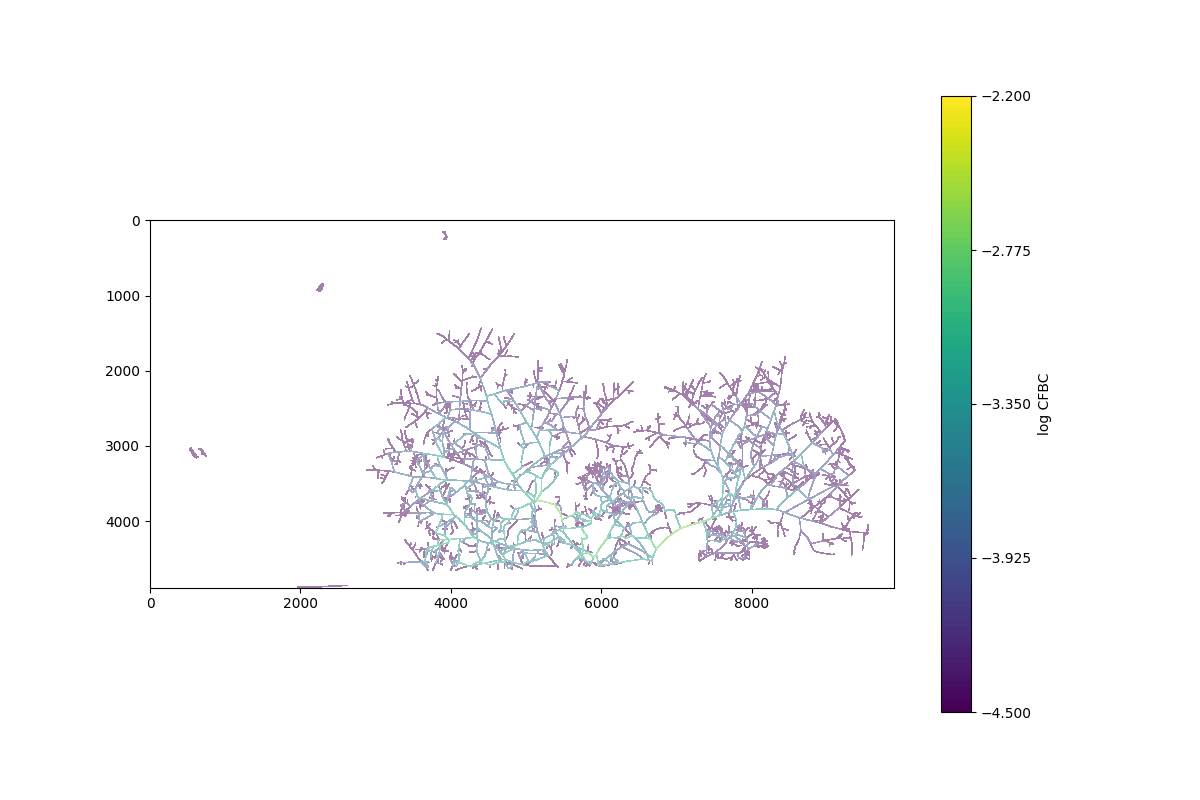

In [35]:
plt.close("all")
t = 20
vmax = -2.2
vmin = -4.5
ax = plot_edge_color_value(
    exp,
    t,
    lambda edge: np.log10(edge.current_flow_betweeness(t)),
    cmap=cm.get_cmap("viridis", 100),
    v_min=vmin,
    v_max=vmax,
    plot_cmap=True,
    show_background=False,
    dilation=20,
    figsize=(12, 8),
    label_colorbar="log CFBC",
)

In [ ]:
vmax = 10
vmin = 2
plot_edge_color_value(
    exp,
    t,
    lambda edge: edge.width(t),
    cmap=cm.get_cmap("viridis", 100),
    v_min=vmin,
    v_max=vmax,
    plot_cmap=True,
    show_background=False,
    dilation=20,
    figsize=(12, 8),
)
# path = r"/scratch-shared/amftrack/transport/full_picture/"
# file_name = f'width.png'
# save_path = os.path.join(path,file_name)
# plt.savefig(save_path, dpi=dpi)

In [43]:
t = 20
thresh = 10 ** (-6)
edges = get_all_edges(exp, t)
edges = [
    edge
    for edge in edges
    if edge.width(t) > 7 and edge.current_flow_betweeness(t) > thresh
]

In [49]:
edges = [edge for edge in edges if len(edge.ts()) >= 10]
# edges = [edge for edge in edges if len(edge.begin.ts())==42]
# edges

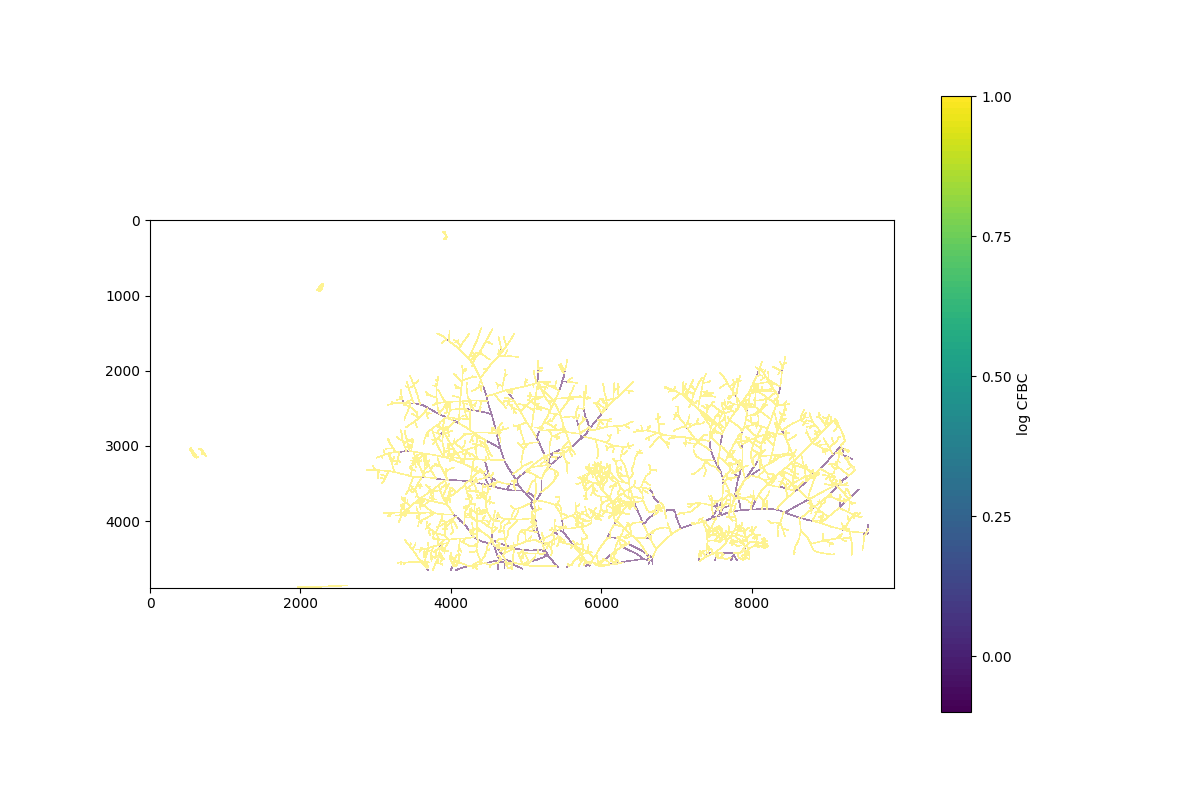

In [45]:
# edges = [edge for edge in edges if len(edge.begin.ts())==42]
plt.close("all")
vmax = 0
vmin = 1
ax = plot_edge_color_value(
    exp,
    t,
    lambda edge: edge in edges,
    cmap=cm.get_cmap("viridis", 100),
    v_min=vmin,
    v_max=vmax,
    plot_cmap=True,
    show_background=False,
    dilation=20,
    figsize=(12, 8),
    label_colorbar="log CFBC",
)

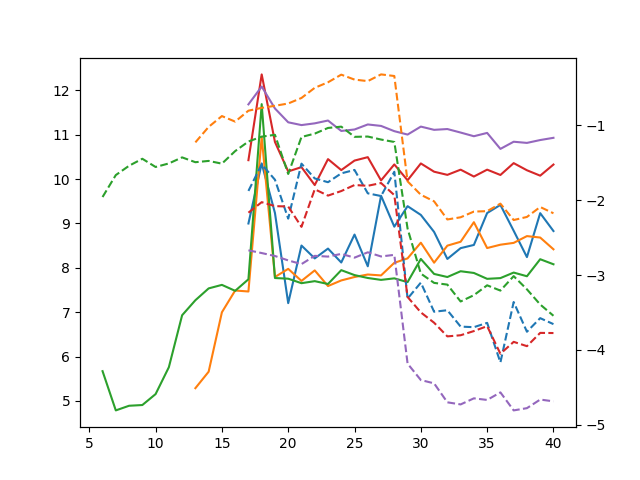

In [48]:
fig, ax = plt.subplots()
edge_choice = np.random.choice(edges, 5)
for edge in edge_choice:
    widths = [edge.width(t) for t in edge.ts()]
    ax.plot(edge.ts(), widths)
ax2 = ax.twinx()
for edge in edge_choice:
    cenralities_m = centralities_min[edge.ts()]
    cenralities_M = centralities_max[edge.ts()]
    widths = np.log10(
        (np.array([edge.current_flow_betweeness(t) for t in edge.ts()]) - cenralities_m)
        / (cenralities_M - cenralities_m)
    )
    ax2.plot(edge.ts(), widths, linestyle="--")

/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


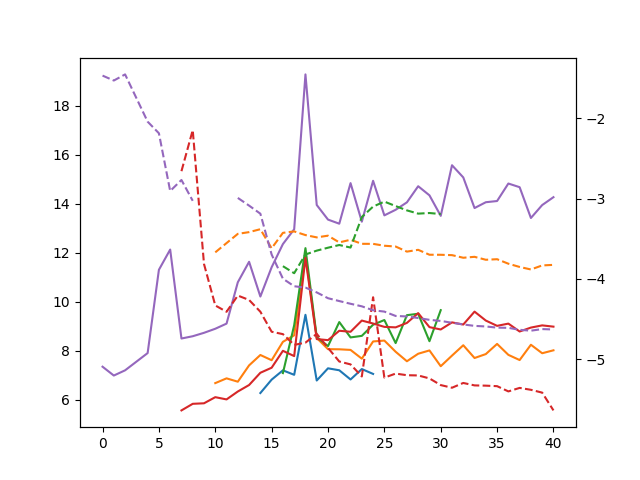

In [57]:
fig, ax = plt.subplots()
edge_choice = np.random.choice(edges, 5)
for edge in edge_choice:
    widths = [edge.width(t) for t in edge.ts()]
    ax.plot(edge.ts(), widths)
ax2 = ax.twinx()
for edge in edge_choice:
    cenralities_m = centralities_min[edge.ts()]
    cenralities_M = centralities_max[edge.ts()]
    widths = np.log10(
        (np.array([edge.betweeness(t) for t in edge.ts()]) - cenralities_m)
    )
    ax2.plot(edge.ts(), widths, linestyle="--")

In [40]:
edgess = [get_all_edges(exp, t) for t in range(0, 41)]
centralities = [
    [edge.current_flow_betweeness(t) for edge in edges]
    for t, edges in enumerate(edgess)
]
centralities_max = np.array([np.max(centraliti) for centraliti in centralities])
centralities_min = np.array([np.min(centraliti) for centraliti in centralities])

In [53]:
edgess = [get_all_edges(exp, t) for t in range(0, 41)]
centralities = [
    [edge.betweeness(t) for edge in edges] for t, edges in enumerate(edgess)
]
centralities_max2 = np.array([np.max(centraliti) for centraliti in centralities])
centralities_min2 = np.array([np.min(centraliti) for centraliti in centralities])

In [18]:
widths

[8.05941,
 9.274187,
 9.500643,
 10.014755,
 8.875594,
 9.275398,
 10.016532,
 9.489347,
 9.861383,
 8.081075,
 9.416389,
 13.1614685,
 11.573608,
 11.51103,
 11.081316,
 9.069292,
 8.401253,
 8.067306,
 8.172525]

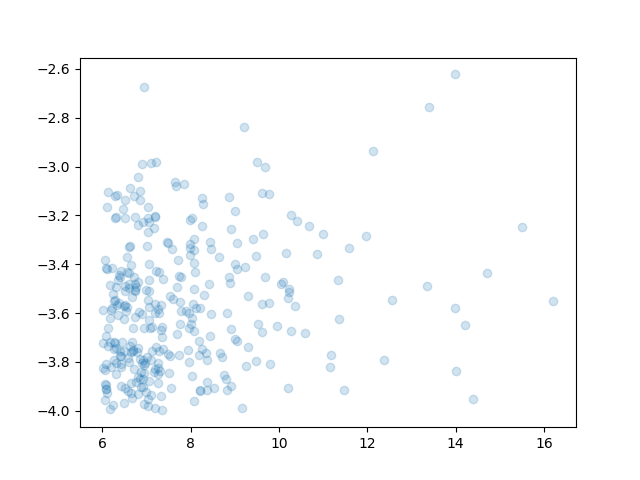

In [42]:
thresh = 1e-4
widths = [
    edge.width(t)
    for edge in edges
    if edge.width(t) > 0 and edge.current_flow_betweeness(t) > thresh
]
centrality = [
    np.log10(edge.current_flow_betweeness(t))
    for edge in edges
    if edge.width(t) > 0 and edge.current_flow_betweeness(t) > thresh
]
fig, ax = plt.subplots()
ax.scatter(widths, centrality, alpha=0.2)
# ax.set_xlim(4,8)

/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


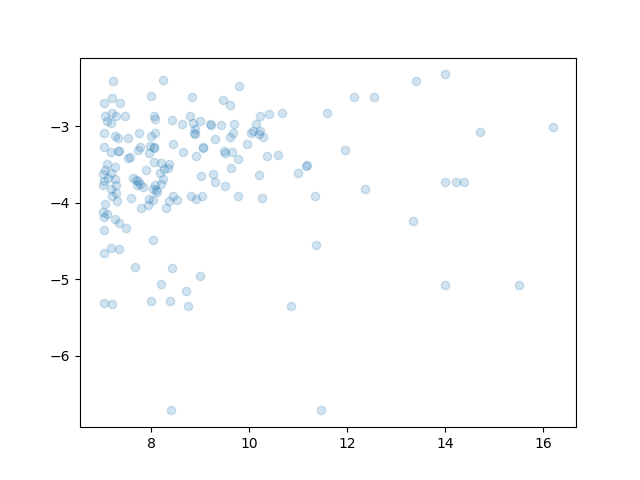

In [54]:
thresh = 1e-4
widths = [
    edge.width(t)
    for edge in edges
    if edge.width(t) > 0 and edge.current_flow_betweeness(t) > thresh
]
centrality = [
    np.log10(edge.betweeness(t))
    for edge in edges
    if edge.width(t) > 0 and edge.current_flow_betweeness(t) > thresh
]
fig, ax = plt.subplots()
ax.scatter(widths, centrality, alpha=0.2)
# ax.set_xlim(4,8)

In [ ]:
fig, ax = plt.subplots()
ax.hist(centrality, 20)

In [ ]:
fig, ax = plt.subplots()
ax.hist(widths, 20)